In [51]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [43]:
plt.style.use('ggplot')

In [8]:
#filename = "vector-documents.csv" # all 19k records, 34613 unique words (columns)
#filename = "vector-documents-2761.csv" # first 3 files, 13175 unique words
filename = "vector-documents-925.csv" # first file only, 7830 unique words
df = pd.read_csv('../Data/reuters21578-preprocessed/' + filename, sep=';', decimal=',')

In [9]:
df.head()

,0,00,000,0000,001,002,004,0077,01,010,...,ZESTRIL,ZIER,ZIMBABW,ZINC,ZJ,ZO,ZOLADEX,ZOLTAN,ZONE,ZURICH
0,0.018974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041308,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.030689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Columns: 7830 entries, 0 to ZURICH
dtypes: float64(7826), int64(4)
memory usage: 55.3 MB


In [53]:
data = df.values

In [54]:
som_x = 20
som_y = 20
som = MiniSom(
    x=som_x,
    y=som_y,
    input_len=df.shape[1],
    #sigma=0.5,
    #learning_rate=0.5
    random_seed=42,
)

In [55]:
som.random_weights_init(data)

In [56]:
som.train_batch(data, num_iteration=5*len(data))

In [57]:
# save som
with open('som.p', 'wb') as outfile:
    pickle.dump(som, outfile)

In [ ]:
# load som
with open('som.p', 'rb') as infile:
    som = pickle.load(infile)

In [58]:
def som_predict(som, data):
    result = []
    for item in tqdm(data):
        x, y = som.winner(item)
        result.append((x,y))
    return result

In [59]:
predicted = som_predict(som, data)

100%|████████████████████████████████████████████████████████████████████████████████| 925/925 [01:18<00:00, 11.82it/s]


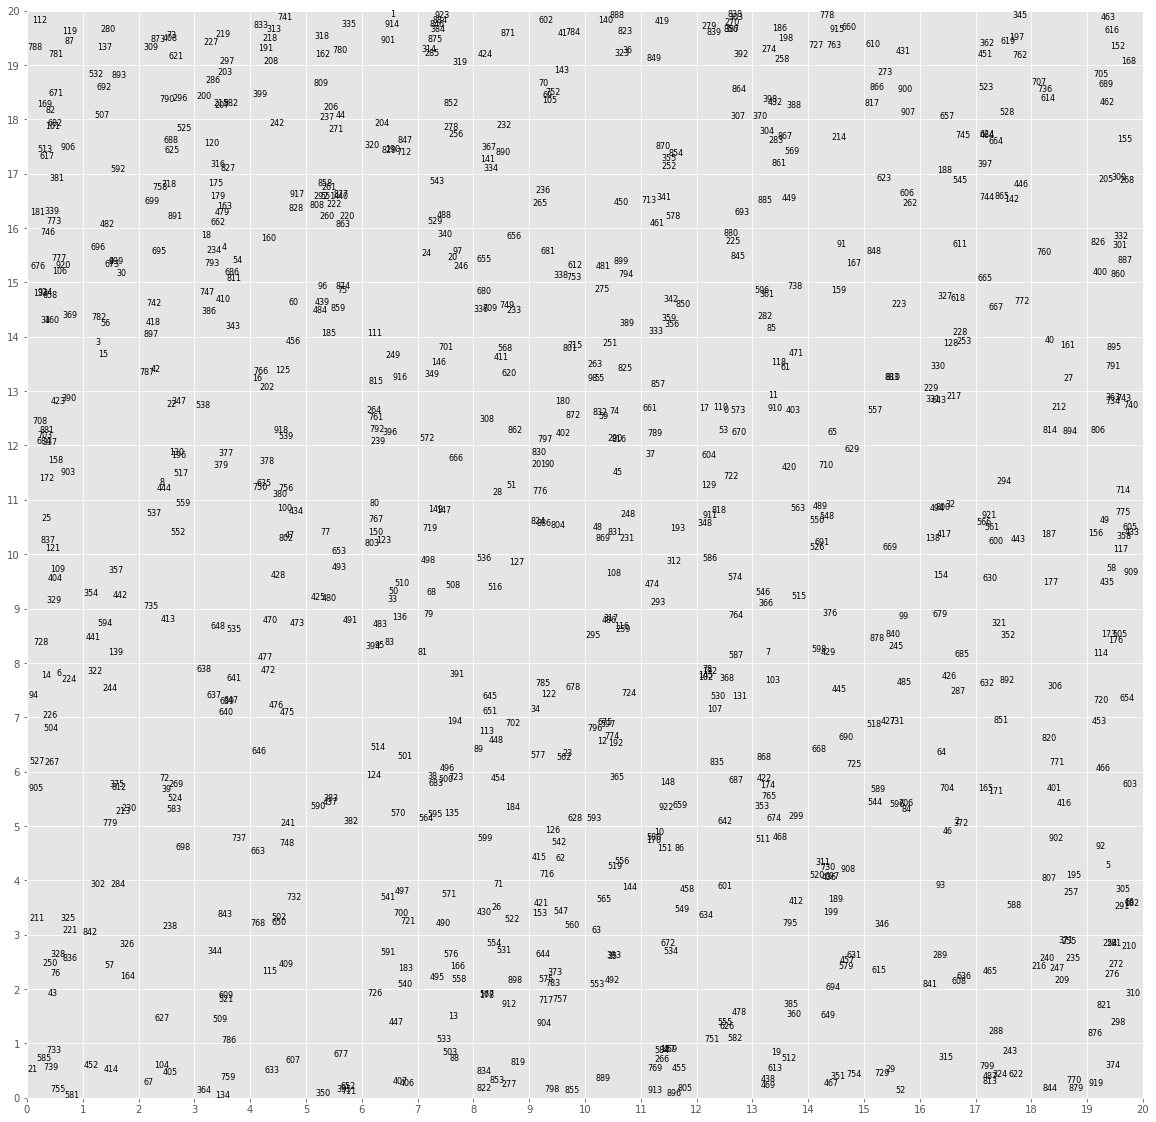

In [65]:
plt.figure(figsize=(som_x, som_y))
for i, (x, y) in enumerate(predicted):
    plt.text(x+np.random.rand()*0.7, y+np.random.rand()*0.9, i, fontsize=8)
plt.xticks(range(som_x+1))
plt.yticks(range(som_y+1))
plt.grid(True)
plt.show()

In [76]:
def query(x, y):
    return [i for i, c in enumerate(predicted) if c == (x, y)]

def query_to_dictionary_with_color(x, y, c):
    return {id: c for id in query(x,y)}

In [133]:
highlighted_documents = []
highlighted_documents += query(0,0) + query(0, 1) + query(1, 0)
highlighted_documents += query(6,6)
highlighted_documents += query(19,15)

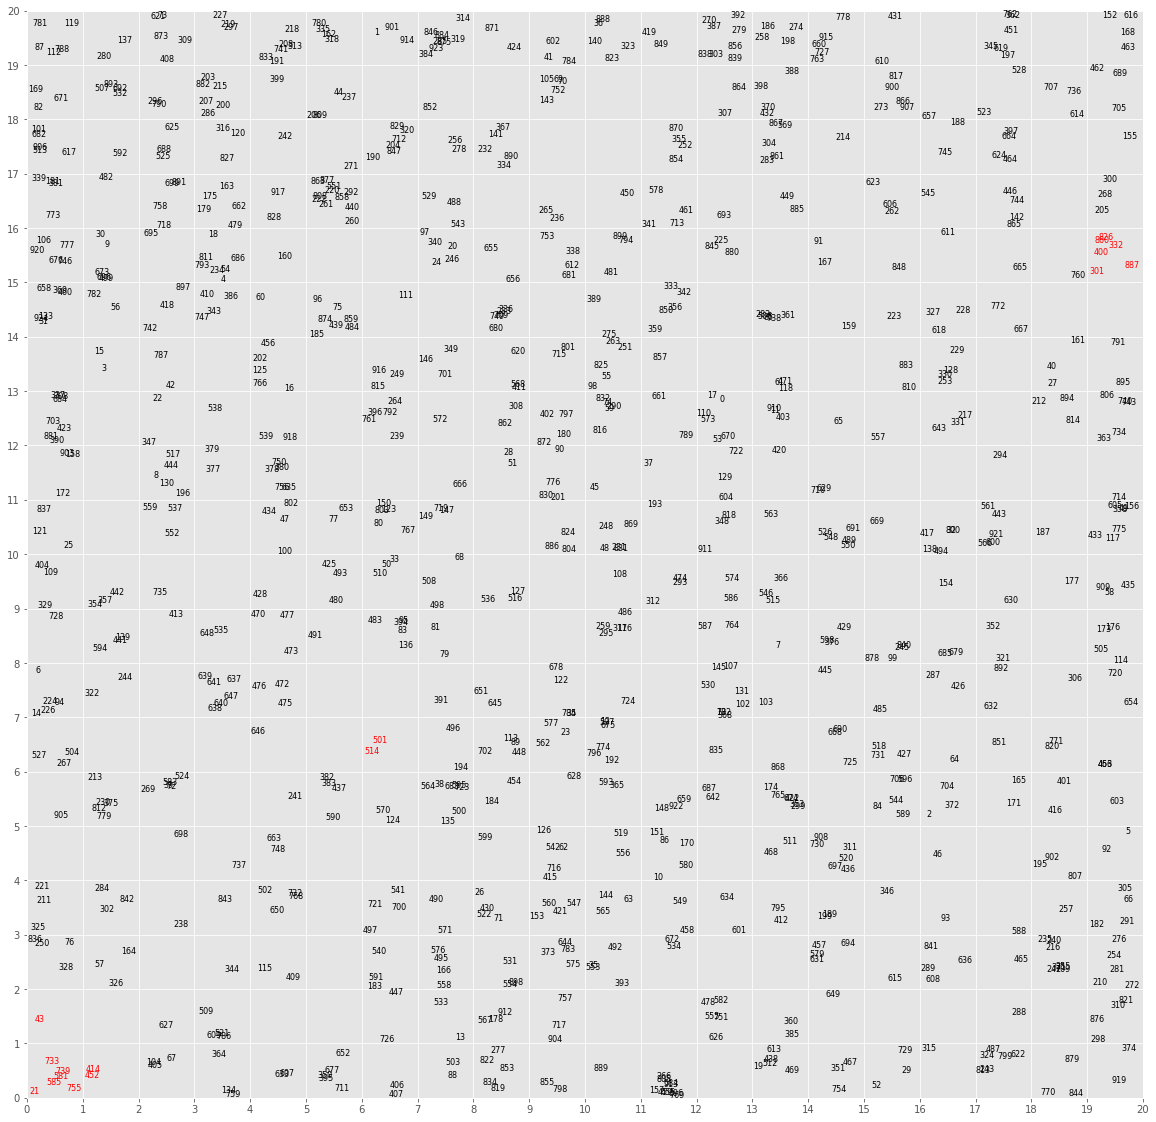

In [134]:
plt.figure(figsize=(som_x, som_y))
for i, (x, y) in enumerate(predicted):
    color = 'red' if i in highlighted_documents else 'black'
    plt.text(x+np.random.rand()*0.7, y+np.random.rand()*0.9, i, fontsize=8, color=color)
plt.xticks(range(som_x+1))
plt.yticks(range(som_y+1))
plt.grid(True)
plt.show()

# Self Organising Map (SOM) and Vector Space Model (VSM)
Comparison of the SOM and the VSM. Verification that both systems found roughly similar documents.

### Results
`SOM(x,y)` is set of documents that SOM aggregated together. It is the same as you can see in the image above in one cell. Note: in code its `query(x,y)`.

`Q(x)` is ordered list of the most similar documents by VSM. Note: you can call `query(som.winner(x))`.

Score is `D(x,y)` which distance between document `x` and document `y`. `0` = documents are different. `1` = documents are the same.

#### SOM(0,0)
`SOM(0, 0) = [21, 581, 585, 733, 739, 755]`

`Q(21)` returns:
```markdown
ID=820, Score=0,153719808550796
ID=191, Score=0,14214328343891
ID=733, Score=0,123390448902497 **hit**
ID=277, Score=0,122004445408929 **hit**
ID=434, Score=0,119676977663414
ID=755, Score=0,114803981796429 **hit**
ID=739, Score=0,114295642488539 **hit**
```

`Q(581)` returns:
```markdown
ID=585, Score=0,98615799402335 **hit**
ID=452, Score=0,244200031492057 **hit** - in SOM(1,0)
ID=414, Score=0,168674704710072 **hit** - in SOM(1,0)
ID=733, Score=0,148685352196671 **hit**
ID=755, Score=0,138471278199331 **hit**
ID=292, Score=0,138417092468989
ID=739, Score=0,134394503360119 **hit**
```

#### SOM(0,1)
`SOM(0, 1) = [43]`

`Q(43)` returns:
```markdown
ID=733, Score=0,319276203755029 **hit** - in SOM(0,0)
ID=755, Score=0,307164632666132 **hit** - in SOM(0,0)
ID=240, Score=0,293124753817221
ID=272, Score=0,290630507794177
ID=739, Score=0,287745626531056 **hit** - in SOM(0,0)
ID=321, Score=0,235105219772267
ID=213, Score=0,188393737535138
ID=632, Score=0,177441108530008
ID=375, Score=0,17228632628136
```

#### SOM(1,0)
`SOM(0, 1) = [414, 452]`

`Q(414)` returns:
```markdown
ID=452, Score=0,250187940744868 **hit**
ID=581, Score=0,168674704710072 **hit** - in SOM(0,0)
ID=503, Score=0,157003461041861
ID=289, Score=0,153823219692348
ID=292, Score=0,153038068027592
ID=405, Score=0,152250180483237
ID=585, Score=0,147325953544989
ID=837, Score=0,132810431371737
ID=85, Score=0,129649280890414
```

#### SOM(6,6)
`SOM(6, 6) = [501, 514]`

`Q(501)` returns:
```markdown
ID=514, Score=0,746595402750695 **hit**
ID=595, Score=0,400764411897037 **hit** - in SOM(7,5)
ID=564, Score=0,398458087878152 **hit** - in SOM(7,5)
ID=723, Score=0,373916534573592 **hit** - in SOM(7,5)
ID=683, Score=0,357399689901338 **hit** - in SOM(7,5)
ID=124, Score=0,345295533712404 **hit** - in SOM(6,5)
ID=38, Score=0,333863366672489 **hit** - in SOM(7,5)
ID=500, Score=0,331129370742467 **hit** - in SOM(7,5)
ID=135, Score=0,320621131371501 **hit** - in SOM(7,5)
```

#### SOM(19,15)
`SOM(19, 15) = [301, 332, 400, 826, 860, 887]`

`Q(301)` returns:
```markdown
ID=332, Score=0,456077221535609 **hit**
ID=826, Score=0,381167611091713 **hit**
ID=400, Score=0,363951400621278 **hit**
ID=887, Score=0,291474583031154 **hit**
ID=205, Score=0,291011030997845 **hit** - in SOM(19,16)
ID=268, Score=0,289979550637191 **hit** - in SOM(19,16)
ID=860, Score=0,282901127889671 **hit**
ID=45, Score=0,217721467354788
ID=831, Score=0,216488911091295
```

And so on... Seems like the SOM returns reasonable results and it is a good approach when you have to deal with unlabeled data.